In [75]:
import ROOT
import matplotlib.pyplot as plt
import math
from matplotlib.patches import Patch 

#filepath = "/mnt/data/eos/simulations/muon_directionality/muon_directionality_test.root"
#filepath = "/home/mpearson5/Eos_env/MuonExperiment/macros/output.ntuple.root"
filepath = "/home/mpearson5/Eos_env/EosSimulations/macros/output.ntuple.root"
#filepath = "/mnt/data/eos/simulations/eos_ambe_10k/eos_ambe_10k_water_0.root"
muonChannels = [254, 252, 253, 238, 237, 236]
#muonPMTs = [0,1,2,3]

muonMapping = {
    254: (15, 14), #Should be a trigger
    252: (15, 12),
    253: (15,13),
    238: (14, 14),
    237: (14, 13),
    236: (14, 12),
}
data = ROOT.RDataFrame("output", filepath)
meta = ROOT.RDataFrame("meta", filepath)
nhits = data.AsNumpy(columns=["nhits"])["nhits"]
hitsPMTs = data.AsNumpy(columns=["hitPMTID"])["hitPMTID"]
mchitPMT = data.AsNumpy(columns=["mcPMTID"])["mcPMTID"]
pmtId = meta.AsNumpy(columns=["pmtId"])["pmtId"]
pmtChannel = meta.AsNumpy(columns=["pmtChannel"])["pmtChannel"]
mcke = data.AsNumpy(columns=["mcke"])["mcke"]
charge = data.AsNumpy(columns=["hitPMTCharge"])["hitPMTCharge"]
triggerTime = data.AsNumpy(columns=["triggerTime"])["triggerTime"]
trackingPosX = data.AsNumpy(columns=["trackPosX"])["trackPosX"]
trackingPosY = data.AsNumpy(columns=["trackPosY"])["trackPosY"]
trackingPosZ = data.AsNumpy(columns=["trackPosZ"])["trackPosZ"]
trackingParticle = data.AsNumpy(columns=["trackPDG"])["trackPDG"]

pmt_map = dict(zip(pmtId[0], pmtChannel[0]))
print(pmt_map)
#print(pmtId)

{0: 0, 1: 254, 2: 236, 3: 0, 4: 237, 5: 252, 6: 224, 7: 112, 8: 225, 9: 226, 10: 113, 11: 227, 12: 228, 13: 114, 14: 229, 15: 230, 16: 231, 17: 115, 18: 232, 19: 233, 20: 116, 21: 234, 22: 117, 23: 235, 24: 240, 25: 118, 26: 241, 27: 242, 28: 243, 29: 244, 30: 119, 31: 245, 32: 246, 33: 120, 34: 121, 35: 247, 36: 248, 37: 122, 38: 249, 39: 250, 40: 123, 41: 251, 42: 256, 43: 257, 44: 258, 45: 259, 46: 260, 47: 261, 48: 262, 49: 263, 50: 264, 51: 265, 52: 266, 53: 267, 54: 268, 55: 0, 56: 1, 57: 2, 58: 3, 59: 4, 60: 5, 61: 6, 62: 7, 63: 8, 64: 9, 65: 10, 66: 11, 67: 12, 68: 13, 69: 14, 70: 184, 71: 16, 72: 17, 73: 18, 74: 19, 75: 20, 76: 21, 77: 22, 78: 23, 79: 24, 80: 25, 81: 26, 82: 27, 83: 28, 84: 29, 85: 30, 86: 185, 87: 32, 88: 33, 89: 34, 90: 35, 91: 36, 92: 37, 93: 38, 94: 39, 95: 40, 96: 41, 97: 42, 98: 43, 99: 44, 100: 45, 101: 46, 102: 186, 103: 48, 104: 49, 105: 50, 106: 51, 107: 52, 108: 53, 109: 54, 110: 55, 111: 56, 112: 57, 113: 58, 114: 59, 115: 60, 116: 61, 117: 62, 118

Error in <TInterpreter::TCling::AutoLoad>: failure loading library libRATDict.so for vector<vector<int> >


In [76]:
# print(nhits)
# print(triggerTime)
# print(charge[0][236])
# print(hitsPMTs[0])
#print(mchitPMT[0])

print(pmt_map)

for event in range(len(triggerTime)):
    #print(pmt_map)
    for channel in muonChannels:
        try:
            pmt = list(pmt_map.keys())[list(pmt_map.values()).index(channel)]
        except ValueError:
            continue
        if pmt in hitsPMTs[event]:
            print(channel)
            print(channel)

{0: 0, 1: 254, 2: 236, 3: 0, 4: 237, 5: 252, 6: 224, 7: 112, 8: 225, 9: 226, 10: 113, 11: 227, 12: 228, 13: 114, 14: 229, 15: 230, 16: 231, 17: 115, 18: 232, 19: 233, 20: 116, 21: 234, 22: 117, 23: 235, 24: 240, 25: 118, 26: 241, 27: 242, 28: 243, 29: 244, 30: 119, 31: 245, 32: 246, 33: 120, 34: 121, 35: 247, 36: 248, 37: 122, 38: 249, 39: 250, 40: 123, 41: 251, 42: 256, 43: 257, 44: 258, 45: 259, 46: 260, 47: 261, 48: 262, 49: 263, 50: 264, 51: 265, 52: 266, 53: 267, 54: 268, 55: 0, 56: 1, 57: 2, 58: 3, 59: 4, 60: 5, 61: 6, 62: 7, 63: 8, 64: 9, 65: 10, 66: 11, 67: 12, 68: 13, 69: 14, 70: 184, 71: 16, 72: 17, 73: 18, 74: 19, 75: 20, 76: 21, 77: 22, 78: 23, 79: 24, 80: 25, 81: 26, 82: 27, 83: 28, 84: 29, 85: 30, 86: 185, 87: 32, 88: 33, 89: 34, 90: 35, 91: 36, 92: 37, 93: 38, 94: 39, 95: 40, 96: 41, 97: 42, 98: 43, 99: 44, 100: 45, 101: 46, 102: 186, 103: 48, 104: 49, 105: 50, 106: 51, 107: 52, 108: 53, 109: 54, 110: 55, 111: 56, 112: 57, 113: 58, 114: 59, 115: 60, 116: 61, 117: 62, 118

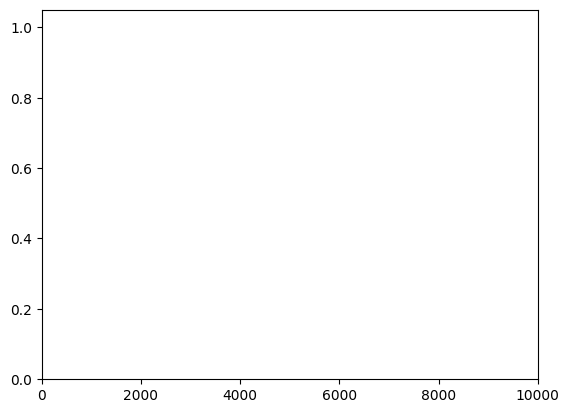

In [2]:
plt.hist(mcke, bins=4000)
plt.xlim([0,10000])
plt.show()

In [12]:
energies = []
charges = []

i = 0
while i < len(triggerTime):
    if triggerTime[i] != 0:
        print(triggerTime[i], mcke[i], charge[i])
        energies.append(mcke[i])
        charges.append(charge[i])
    i += 1

7.35 999.9999999999999 { 96.520103, 97.573332, 97.603206, 49.065073, 17.451581, 14.189790, 57.098777, 88.923636, 122.21789, 5.1216856, 3.8974401, 80.508607, 28.845704, 70.126230, 4.5367289, 42.345971, 18.583533, 62.636929, 7.9202238, 145.98445, 21.630301, 147.50874, 76.854369, 7.7474987, 85.765295, 143.58496, 195.25363, 14.526528, 4.7205631, 87.106486, 17.697418, 92.746026, 18.961916, 14.888511, 14.560057, 21.961081, 11.936898, 8.3757719, 62.693972, 11.667355, 4.6274430, 85.619369, 65.941402, 9.3843721, 5.9210289, 14.491562, 13.852917, 120.35128, 10.865906, 57.761713, 19.661931, 7.4795972, 144.31239, 2.7269826, 92.631407, 6.3037981, 4.4515169, 1.8277122, 6.3860561, 4.3753090, 9.1314647, 18.534378, 103.28574, 5.0486496, 145.32919, 0.79685012, 136.13249, 97.218341, 278.13230, 13.299623, 433.91835, 228.53926, 279.88059, 95.468698, 183.58988, 125.18995, 19.677174, 5.3159667, 15.392260, 2.9430919, 31.165902, 7.7967426, 8.5182827, 17.123431, 100.20905, 14.583643, 158.87177, 7.7217131, 23.083

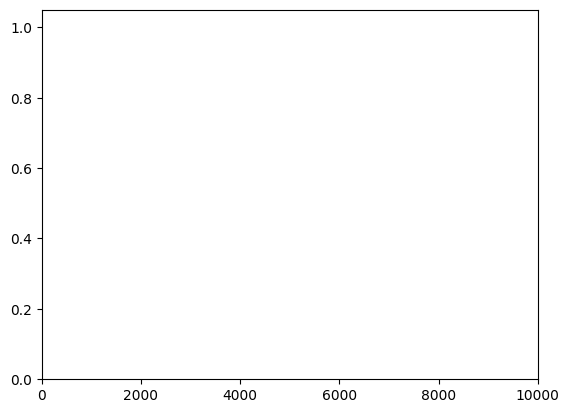

In [13]:
plt.hist(energies, bins=4000)
plt.xlim([0,10000])
plt.show()

In [ ]:
plt.hist(charges[0], bins=1000)
plt.show()

/home/mpearson5/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


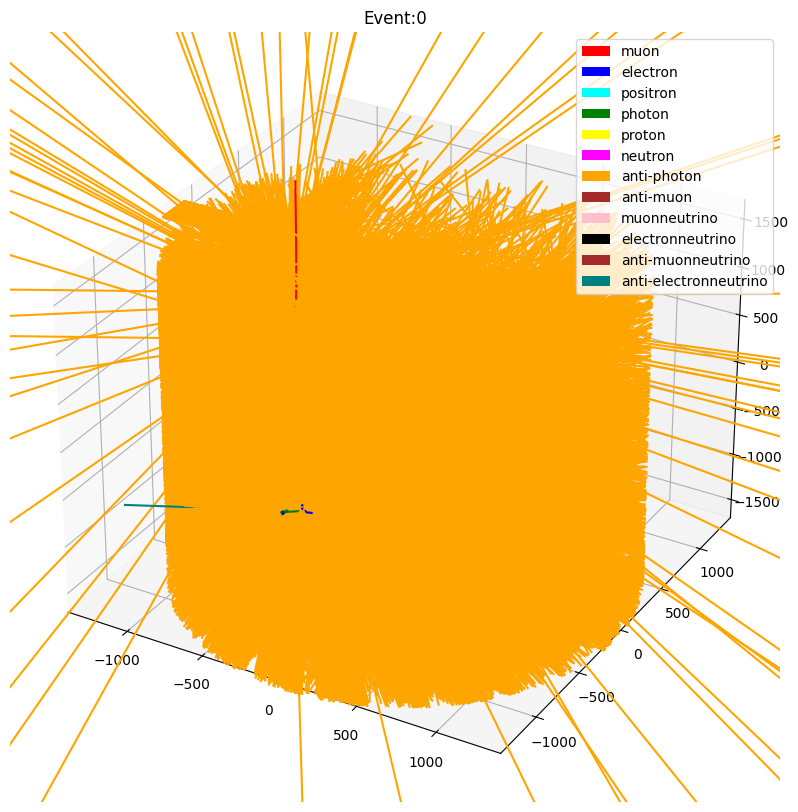

500.00000000000017MeV
nhits:3


NameError: name 'pmtCharge' is not defined

In [147]:
# Plots the tracks of the particles from the simulation

#df = ROOT.RDataFrame("output", "eos_ambe_1k_water.root")

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_xlim([-1400,1400])
ax.set_ylim([-1400,1400])
ax.set_zlim([-1700,1700])

#event 6
event = 0

#print(trackingPosX[0])
#print(tackingParticle[event])

particles = {
    -22:"anti-photon",
    11:"electron",
    -11:"positron",
    22:"photon",
    13:"muon",
    -13:"anti-muon",
    2212:"proton",
    2112:"neutron",
    14:"muonneutrino",
    -14:"anti-muonneutrino",
    -12:"anti-electronneutrino",
    12:"electronneutrino",
}

colorPalette = {
    "muon": "red",
    "electron": "blue",
    "positron": "cyan",
    "photon": "green",
    "proton": "yellow",
    "neutron": "magenta",
    "anti-photon": "orange",
    "anti-muon": "brown",
    "muonneutrino":"pink",
    "electronneutrino": "black",
    "anti-muonneutrino": "brown",
    "anti-electronneutrino": "teal",
}

particlBlacklist = [""]

# Setting up lengend
# legendElements = []
# for particle in DisplayParticles:
#     legendElements.append(Patch(facecolor=colorPalette[particle], label=particle))
legendElements = []
for index, particle in enumerate(colorPalette):
    #print(index, particle)
    legendElements.append(Patch(facecolor=colorPalette[particle], label=particle))

plt.legend(handles=legendElements)
plt.title("Event:"+str(event))

for vector in zip(trackingPosX[event], trackingPosY[event], trackingPosZ[event], trackingParticle[event]):
    try:
        if particles[vector[3]] in particlBlacklist:
            continue
    except KeyError:
        print("Missing particle:" + str(vector[3]))
        continue
        
    x = []
    y = []
    z = []
    for xcomponent in vector[0]:
        x.append(xcomponent)
    for ycomponent in vector[1]:
        y.append(ycomponent)
    for zcomponent in vector[2]:
        z.append(zcomponent)

    ax.plot3D(x, y, z, colorPalette[particles[vector[3]]])

plt.show()
print(str(mcke[event]) + "MeV")
print("nhits:" + str(nhits[event]))
print("PMTCharge" + str(pmtCharge[event]))

# Plot ocupancy of muon paddles

[15, 15, 14, 15, 14, 15, 15, 14, 14, 14, 14, 14, 15, 15, 14, 15, 15, 14, 15, 14, 14, 14, 15, 15, 14, 15, 15, 14, 14, 15, 14, 14, 14, 14, 15, 14, 14, 15, 14, 14, 15, 15, 14, 14, 15, 15, 14, 15, 15, 14, 15, 15, 14, 15, 15, 14, 15, 14, 14, 15, 15, 15, 14, 14, 14, 15, 14, 15, 14, 15, 15, 14, 15, 15, 14, 15, 15, 14, 14, 14, 15, 14, 14, 15, 14, 14, 15, 15, 14, 14, 15, 14, 15, 14, 15, 14, 14, 14, 15, 14, 14, 14, 14, 15, 14, 15, 15, 14, 14, 14, 14, 14, 15, 15, 15, 14, 14, 15, 15, 14, 15, 15, 15, 14, 15, 14, 14, 14, 14, 15, 14, 14, 15, 14, 14, 15, 14, 14, 14, 14, 15, 14, 15, 15, 14, 15, 15, 15, 15, 15, 14, 15, 15, 14, 14, 15, 15, 15, 15, 14, 14, 14, 14, 15, 15, 14, 14, 14, 15, 14, 14, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 14, 14, 15, 14, 14, 15, 15, 15, 15, 15, 15, 14, 14, 15, 15, 15, 15, 15, 14, 15, 15, 14, 15, 14, 15, 14, 15, 15, 14, 15, 14, 14, 15, 14, 15, 14, 14, 15, 15, 14, 14, 14, 15, 14, 14, 14, 14, 15, 15, 15, 14, 15, 14, 15, 14, 14, 14, 15, 15, 15, 14, 14, 14,

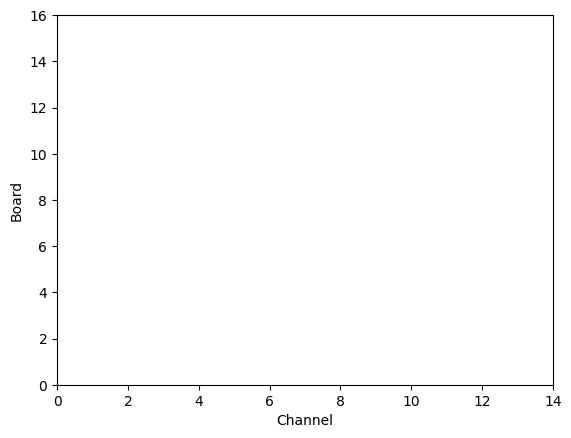

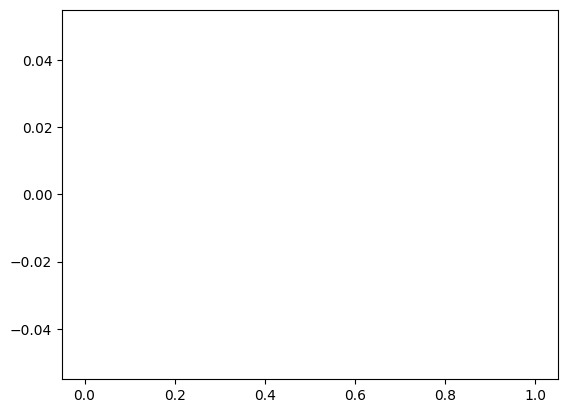

In [25]:
boards = []
channels = []
hitPMTs = []

for event in range(len(triggerTime)):
    for channel in muonChannels:
        pmt = list(pmt_map.keys())[list(pmt_map.values()).index(channel)]
        if pmt in mchitPMT[event]:
            #print(pmt)
            boards.append(muonMapping[channel][0])
            channels.append(muonMapping[channel][1])

    #hitPMTs.append(pmt)
print(boards)
print(channels)

plt.hist2d(boards, channels)
plt.xlim([0,14])
plt.ylim([0,16])
axes = plt.gca()
axes.set_xlabel("Channel")
axes.set_ylabel("Board")
plt.show()
plt.hist(hitPMTs, bins=250)
plt.show()

# Find angular resolution of a tripple event

[44]


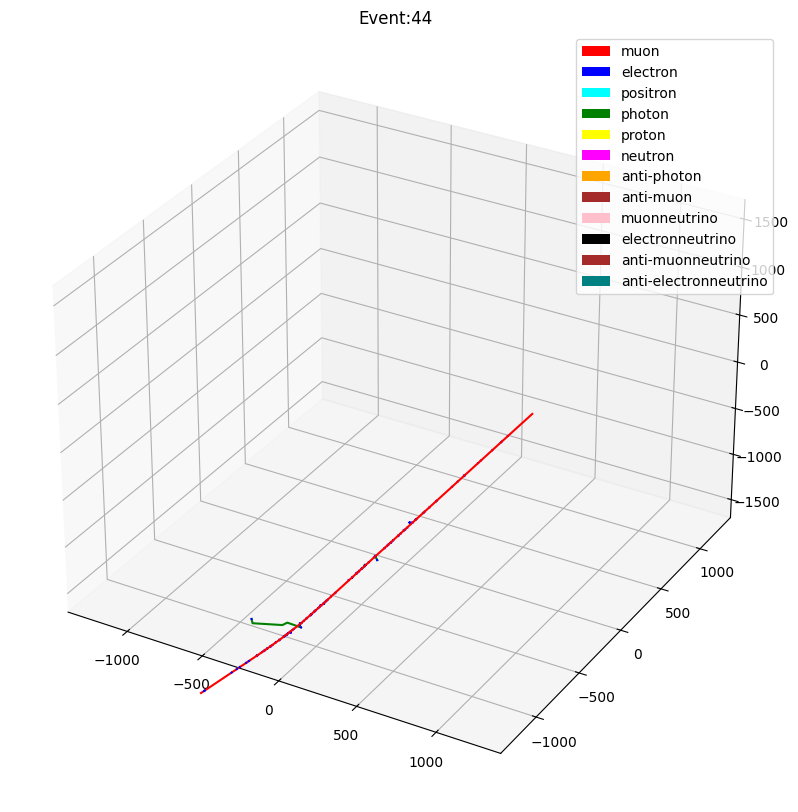

In [77]:

tripple = [237,238,238]
pmt1 = list(pmt_map.keys())[list(pmt_map.values()).index(tripple[0])]
pmt2 = list(pmt_map.keys())[list(pmt_map.values()).index(tripple[0])]
pmt3 = list(pmt_map.keys())[list(pmt_map.values()).index(tripple[0])]

tripleEvents = []

for event in range(len(triggerTime)):
    #if ((pmt1 in mchitPMT[event]) and (pmt2 in mchitPMT[event]) and (pmt3 in mchitPMT[event])):
    if ((pmt1 in hitsPMTs[event]) and (pmt2 in hitsPMTs[event])):
        tripleEvents.append(event)

print(tripleEvents)

def plotEvent(ax, event):
    #event 6
    
    #print(trackingPosX[0])
    #print(tackingParticle[event])
    
    particles = {
        -22:"anti-photon",
        11:"electron",
        -11:"positron",
        22:"photon",
        13:"muon",
        -13:"anti-muon",
        2212:"proton",
        2112:"neutron",
        14:"muonneutrino",
        -14:"anti-muonneutrino",
        -12:"anti-electronneutrino",
        12:"electronneutrino",
    }
    
    colorPalette = {
        "muon": "red",
        "electron": "blue",
        "positron": "cyan",
        "photon": "green",
        "proton": "yellow",
        "neutron": "magenta",
        "anti-photon": "orange",
        "anti-muon": "brown",
        "muonneutrino":"pink",
        "electronneutrino": "black",
        "anti-muonneutrino": "brown",
        "anti-electronneutrino": "teal",
    }
    
    particlBlacklist = ["anti-photon"]
    
    # Setting up lengend
    # legendElements = []
    # for particle in DisplayParticles:
    #     legendElements.append(Patch(facecolor=colorPalette[particle], label=particle))
    legendElements = []
    for index, particle in enumerate(colorPalette):
        #print(index, particle)
        legendElements.append(Patch(facecolor=colorPalette[particle], label=particle))
    
    plt.legend(handles=legendElements)
    plt.title("Event:"+str(event))
    
    for vector in zip(trackingPosX[event], trackingPosY[event], trackingPosZ[event], trackingParticle[event]):
        try:
            if particles[vector[3]] in particlBlacklist:
                continue
        except KeyError:
            print("Missing particle:" + str(vector[3]))
            continue
            
        x = []
        y = []
        z = []
        for xcomponent in vector[0]:
            x.append(xcomponent)
        for ycomponent in vector[1]:
            y.append(ycomponent)
        for zcomponent in vector[2]:
            z.append(zcomponent)
    
        ax.plot3D(x, y, z, colorPalette[particles[vector[3]]])

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_xlim([-1400,1400])
ax.set_ylim([-1400,1400])
ax.set_zlim([-1700,1700])

for event in tripleEvents:
    plotEvent(ax, event)
plt.show()
